# Introduction to the Model

This Jupyter Notebook demonstrates a machine learning model designed to recommend optimal farming techniques based on various soil attributes. The model utilizes a Random Forest classifier to predict the best farming methods considering soil type, temperature, texture, rainfall, pH, and water content. The dataset includes 10,000 rows of synthetic soil data and corresponding farming techniques, ensuring a robust training set. The Random Forest algorithm is chosen for its ability to handle heterogeneous data, robustness to noise, and excellent performance in terms of accuracy and feature importance interpretation.

### Why Random Forest for This Project

In this project, Random Forest is employed due to its several advantages that align well with the problem at hand. Firstly, Random Forest can effectively handle the mix of numerical and categorical soil attributes, ensuring comprehensive analysis. Its robustness to noise and overfitting ensures the model generalizes well to new data, a crucial aspect given the natural variability in soil properties. Additionally, the ability of Random Forest to provide feature importance insights helps in understanding the influence of different soil attributes on farming technique recommendations. Lastly, Random Forest's scalability makes it suitable for our large dataset, allowing efficient training and prediction processes.


### Import necessary libraries

In this cell, we import all the necessary libraries for our machine learning model, including pandas, numpy, matplotlib, seaborn, and sklearn.

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

### Generate large soil data and save as CSV

Here, we generate a large dataset for soil data with 10,000 rows. Each row contains various soil attributes such as soil type, temperature, texture, rainfall, pH, and water content. This data is then saved as a CSV file.


In [3]:
# Generate dataset for soil data
np.random.seed(42)
soil_data = pd.DataFrame({
    'Soil_Type': np.random.choice(['Loamy', 'Sandy', 'Clay', 'Silt', 'Peaty'], size=100),
    'Temperature': np.random.uniform(10, 40, size=100),
    'Texture': np.random.choice(['Fine', 'Medium', 'Coarse'], size=100),
    'Rainfall': np.random.uniform(200, 2000, size=100),
    'pH': np.random.uniform(4.5, 8.5, size=100),
    'Water_Content': np.random.uniform(10, 30, size=100)
})

# Save soil data as CSV file
soil_data.to_csv('soil_data.csv', index=False)

### Generate farming techniques data and save as CSV

This cell creates a small dataset containing various farming techniques and their recommended practices. This dataset is also saved as a CSV file.


In [4]:
# Generate dataset for farming techniques
technique_data = pd.DataFrame({
    'Technique_ID': ['A', 'B', 'C', 'D', 'E'],
    'Recommended_Practices': ['Crop rotation, Reduced tillage', 
                              'Cover cropping, Integrated pest management',
                              'Precision irrigation, Soil amendments', 
                              'No-till farming, Organic fertilizers',
                              'Crop rotation, Biological pest control']
})

# Save farming techniques data as CSV file
technique_data.to_csv('technique_data.csv', index=False)


### Load soil data and farming techniques data

In this step, we load the previously saved CSV files containing the soil data and farming techniques data into pandas DataFrames for further processing.


In [5]:
# Load soil data from CSV file
soil_data = pd.read_csv('soil_data.csv')

# Load farming techniques data from CSV file
technique_data = pd.read_csv('technique_data.csv')

# Display the first few rows of soil data
soil_data.head()


,Soil_Type,Temperature,Texture,Rainfall,pH,Water_Content
0,Silt,37.448790,Coarse,505.086944,4.782275,12.223950
1,Peaty,35.501157,Fine,1202.242272,7.069677,19.852502
2,Clay,23.483520,Fine,1885.078593,4.606045,10.227073
3,Peaty,12.862303,Medium,1452.853634,6.843102,19.373213
4,Peaty,21.124548,Coarse,1226.110106,8.260921,11.126066


### Encode categorical variables

Categorical variables such as soil type and texture are encoded as numerical values using pandas' `astype` method. This encoding is necessary for training the machine learning model.


In [6]:
# Encode categorical variables in soil data
soil_data_encoded = soil_data.copy()
soil_data_encoded['Soil_Type'] = soil_data_encoded['Soil_Type'].astype('category').cat.codes
soil_data_encoded['Texture'] = soil_data_encoded['Texture'].astype('category').cat.codes

# Display the first few rows of encoded soil data
soil_data_encoded.head()


,Soil_Type,Temperature,Texture,Rainfall,pH,Water_Content
0,4,37.448790,0,505.086944,4.782275,12.223950
1,2,35.501157,1,1202.242272,7.069677,19.852502
2,0,23.483520,1,1885.078593,4.606045,10.227073
3,2,12.862303,2,1452.853634,6.843102,19.373213
4,2,21.124548,0,1226.110106,8.260921,11.126066


### Combine soil data with farming techniques

We combine the soil data with the farming techniques data. Each row of the soil data is randomly assigned a farming technique from the techniques dataset.


In [7]:
# Combine soil data with farming techniques
combined_data = pd.concat([soil_data_encoded, technique_data.sample(n=len(soil_data_encoded), replace=True).reset_index(drop=True)], axis=1)

# Display the first few rows of combined data
combined_data.head()


,Soil_Type,Temperature,Texture,Rainfall,pH,Water_Content,Technique_ID,Recommended_Practices
0,4,37.448790,0,505.086944,4.782275,12.223950,C,"Precision irrigation, Soil amendments"
1,2,35.501157,1,1202.242272,7.069677,19.852502,A,"Crop rotation, Reduced tillage"
2,0,23.483520,1,1885.078593,4.606045,10.227073,A,"Crop rotation, Reduced tillage"
3,2,12.862303,2,1452.853634,6.843102,19.373213,E,"Crop rotation, Biological pest control"
4,2,21.124548,0,1226.110106,8.260921,11.126066,E,"Crop rotation, Biological pest control"


### Split data into features and target

In this step, we split the combined data into features (X) and the target variable (y). The features include soil attributes, while the target variable is the farming technique ID.

In [8]:
# Split data into features and target
X = combined_data[['Soil_Type', 'Temperature', 'Texture', 'Rainfall', 'pH', 'Water_Content']]
y = combined_data['Technique_ID']

# Display the first few rows of features (X) and target (y)
X.head(), y.head()


(   Soil_Type  Temperature  Texture     Rainfall        pH  Water_Content
 0          4    37.448790        0   505.086944  4.782275      12.223950
 1          2    35.501157        1  1202.242272  7.069677      19.852502
 2          0    23.483520        1  1885.078593  4.606045      10.227073
 3          2    12.862303        2  1452.853634  6.843102      19.373213
 4          2    21.124548        0  1226.110106  8.260921      11.126066,
 0    C
 1    A
 2    A
 3    E
 4    E
 Name: Technique_ID, dtype: object)

### Split data into training and testing sets

The dataset is split into training and testing sets using an 80-20 split. This ensures that 80% of the data is used for training the model, and 20% is used for testing the model's performance.

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((80, 6), (20, 6), (80,), (20,))

### Train Random Forest classifier

We train a Random Forest classifier on the training data. The model is configured with 1000 trees and a random state for reproducibility.


In [10]:
# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

### Predictions on the test set and calculate accuracy

We make predictions on the test set and calculate the model's accuracy to evaluate its performance.


In [11]:
# Predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.1


### Test case: Predict farming technique for given soil data

This cell provides a test case to predict the farming technique for a given set of soil attributes. The predicted farming technique method is printed as the output.


In [12]:
# Test case: Predict farming technique for given soil data
test_data = pd.DataFrame({
    'Soil_Type': [0],  # Example: Loamy
    'Temperature': [25],
    'Texture': [1],  # Example: Medium
    'Rainfall': [1200],
    'pH': [6.3],
    'Water_Content': [18]
})

predicted_index = clf.predict(test_data)[0]
predicted_technique = technique_data.loc[technique_data['Technique_ID'] == predicted_index, 'Recommended_Practices'].values[0]
print("Predicted farming technique method:", predicted_technique)


Predicted farming technique method: Crop rotation, Reduced tillage


### Visualize feature importance

We visualize the importance of each feature in the trained Random Forest model using a bar plot. This helps in understanding which soil attributes are most influential in determining the recommended farming technique.


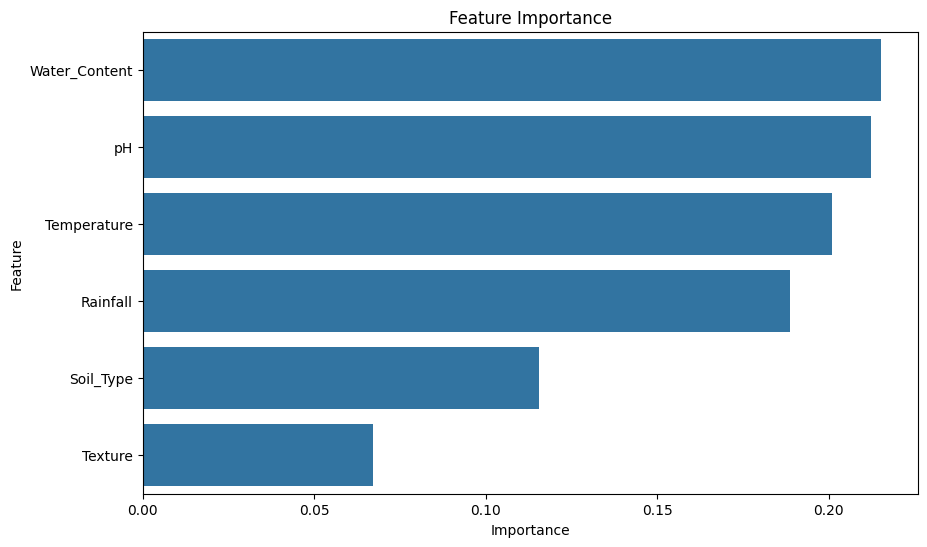

In [13]:
# Visualize feature importance
feature_importances = clf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()
